In [1]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")
import torch
from matplotlib.pyplot import figure
from datasets import DatasetSinteticUnsupervisedLSTM

figure(figsize=(8, 6), dpi=80)

limiter = 2000

ABS_PATH = '/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset'

test_dataset = DatasetSinteticUnsupervisedLSTM(dir_data=f'{ABS_PATH}/Datasets/sintetic_data/train_compressor_data.h5',
                                       context=400,
                                       stride=1)

test_loader = torch.utils.data.DataLoader(
                test_dataset, batch_size=1, shuffle=False
                )

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4100/4100 [00:00<00:00, 1724147.42it/s]

len dataset:4100


<Figure size 640x480 with 0 Axes>

In [2]:
def union_vector_predicted_dict(data_predict:dict):
    
    x_concat = data_predict[0]
    
    del data_predict[0]
    
    keys_predicted = list(data_predict.keys())
    
    for key in keys_predicted:
        x_concat = torch.concat((x_concat, data_predict[key]), dim=1)
        
        del data_predict[key]
    
    return x_concat

In [3]:
data_predict = torch.load(f"../sintetic_generate_data_LSTM.pt")

In [4]:
data_predict[0].shape

torch.Size([1, 1, 1])

In [5]:
vet_predict = union_vector_predicted_dict(data_predict)

In [6]:
vet_predict[0,400:,0]

tensor([-0.6649, -0.9147, -0.8633,  ..., 92.5556, 92.6213, 92.7789])

## Concat Vets

In [7]:
# x_true, _ = test_loader.dataset[0]

# get_n_elements = len(test_loader.dataset)

# for i in range(1, get_n_elements):
    
#     x_second, _ = test_loader.dataset[i]
    
#     x_true = torch.concat((x_true, x_second), dim=0)
    
x_true = test_dataset.data

x_true.shape, vet_predict.shape

((4500, 1), torch.Size([1, 4500, 1]))

### First channel

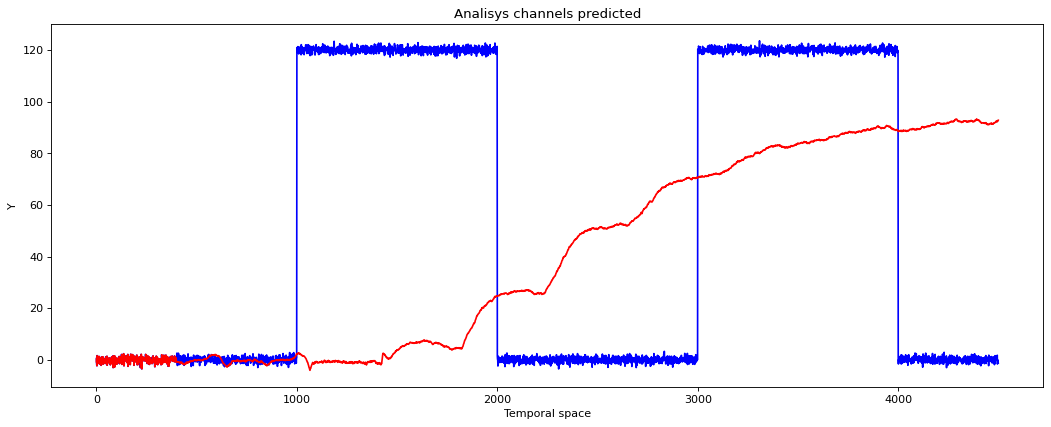

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)
init_limiter = 400
limiter = 400 + 500

#plt.plot(data_normal_train[:limiter,0])

#fig, axs = plt.subplots(1, 2, figsize=(15, 15))

feature_channel = 0
plt.xlabel('Temporal space')
plt.ylabel('Y')
plt.title("Analisys channels predicted")
# plt.plot(x_true[init_limiter:limiter, feature_channel], color='blue', label='sinal Real')
# plt.plot(vet_predict[0][init_limiter:limiter, feature_channel], color='r', label='sinal previsto')
plt.plot(x_true, color='blue', label='sinal Real')
plt.plot(vet_predict[0], color='r', label='sinal previsto')


In [9]:
abs(x_true[init_limiter:limiter, feature_channel] - vet_predict[0][init_limiter:limiter, feature_channel].numpy())[:100]

array([4.27998786e-04, 3.44994358e+00, 3.45742363e+00, 1.38788426e-01,
       1.36553752e+00, 8.25210580e-01, 6.88668133e-01, 7.81862233e-01,
       1.17660402e+00, 3.32364460e+00, 3.52256059e-01, 6.19994435e-01,
       9.63557899e-01, 2.20389768e+00, 2.86888976e+00, 2.68108368e-01,
       9.91422098e-01, 1.44768857e+00, 3.99454949e-01, 6.08172985e-01,
       2.68746493e+00, 1.86026894e+00, 7.30091322e-01, 3.10544858e-01,
       1.19119705e+00, 1.51281702e+00, 1.43791672e+00, 9.27236279e-01,
       1.60706121e+00, 2.66195942e+00, 2.98075677e+00, 3.92930663e-01,
       5.66241439e-01, 2.02460201e+00, 3.42588882e+00, 2.97409254e+00,
       1.13650246e+00, 2.89066802e-01, 5.85214381e-01, 8.74495615e-01,
       3.63152429e+00, 8.73300825e-01, 2.73861275e+00, 3.24159764e-01,
       1.34293043e+00, 1.51397313e+00, 1.33090702e+00, 1.71902340e+00,
       1.87270095e+00, 1.17090618e+00, 2.05334433e-01, 1.78179310e+00,
       3.34287737e-01, 3.72338947e-01, 5.00517847e-01, 5.30592448e-01,
      

In [10]:
type(x_true[init_limiter:limiter, feature_channel])

numpy.ndarray